**INTRODUCCION A LA PROGRAMACION CUANTICA**
-------------------------------------------------------
Prof: Carmen Pellicer Lostao</br>
[Linkedin](https://www.linkedin.com/in/cpellicerlostao/)</br>
[email](cpellicerlostao@gmail.com)

# D-WAVE OCEAN

## Intro

Lea los documentos para obtener más información: https://docs.ocean.dwavesys.com/en/stable/getting_started.html

**¿Nuevo en Jupyter Notebooks?** Los JN se dividen en celdas de texto o código. Al presionar el botón **Ejecutar** en la barra de menú se pasa a la siguiente celda. Las celdas de código están marcadas con "En: \[\]" a la izquierda; cuando se ejecuta, se muestra un asterisco hasta que se completa el código: "En: \[\*\]".

## Instalación del SDK de Ocean

D-Wave Ocean SDK (Ocean) es una colección de software que utiliza máquinas D-Wave. Es fácil utilizar varias funciones de Python.

Github: https://github.com/dwavesystems/dwave-ocean-sdk

Documento: https://docs.ocean.dwavesys.com/en/latest/

Guía: https://docs.ocean.dwavesys.com/en/stable/overview/install.html

Para instalar Ocean, use pip como se describe en el enlace anterior o clone el repositorio de github.

In [ ]:
%pip install dwave-ocean-sdk

In [ ]:
#Advanced users might directly install the latest (development) SDK from the D-Wave GitHub repository using a command such as,
#%pip install git+https://github.com/dwavesystems/dwave-ocean-sdk

In [ ]:
#Alternatively, you can clone the dwave-ocean-sdk repo and install the SDK to your virtual environment; for example:
#%git clone https://github.com/dwavesystems/dwave-ocean-sdk.git
#%cd dwave-ocean-sdk
#%python setup.py install

## Configuración del acceso a los solucionadores de Leap

La **Solver API (SAPI)** de D-Wave proporciona acceso a los solucionadores (recursos informáticos para resolver problemas, como computadoras cuánticas D-Wave y solucionadores híbridos cuánticos clásicos) alojados en la nube cuántica de Leap.

Necesita credenciales SAPI para acceder a estos recursos. Estas credenciales son **un token** que identifica su cuenta en Dwave.

### Configuración del entorno de herramientas oceánicas

El dwave-ocean-sdk incluye un **programa CLI** interactivo que lo guía a través de la configuración de un entorno virtual con todas las herramientas necesarias e interesantes para trabajar con los sistemas Dwave. (CLI significa interfaz de línea de comando)

Para una experiencia de desarrollo completa y sencilla, se recomienda que antes de comenzar a escribir código, se complete la configuración de su entorno.

También es recomendable que se incluya los dos últimos pasos:

Instale Contributor Ocean Tools, agrega **herramientas que no son de código abierto** como el **Problem Inspector**.

In [2]:
#Install optional non-open-source Ocean packages
#see help for available commands and then run the install
%dwave install --help

Usage: dwave install [OPTIONS] [PACKAGES]...

  Install optional non-open-source Ocean packages.

Options:
  -l, --list                   List available contrib (non-OSS) packages
  -a, --all                    Install all contrib (non-OSS) packages
  -u, --update                 Reinstall all installed contrib packages
  -y, --accept-license, --yes  Accept license(s) without prompting
  -v, --verbose                Increase output verbosity (additive, up to 4
                               times)  [default: 0]
  --help                       Show this message and exit.


In [4]:
!dwave install

Nothing to do. Try "dwave install --help".


En el entorno virtual que creó como parte de la instalación de Ocean Tools, ejecute el comando **dwave setup**. Una vez que el entorno esté configurado en la instalación, no necesitará incluir el token u otros parámetros de la cuenta en el código.

La configuración crea un **archivo de configuración** que las primitivas de Ocean usarán automáticamente para incluir estos parámetros cuando use SAPI.

Los nuevos usuarios pueden aceptar los valores predeterminados del comando de configuración de dwave (presione Enter) para todas las solicitudes excepto el token de autenticación, que se muestra en el panel de Leap de su cuenta. La sección Configuración del acceso a los solucionadores de Leap explica cómo puede actualizar la configuración de su entorno de trabajo en cualquier momento.

In [ ]:
#run in terminal
!dwave setup

#### Working with the config file

To manage or change the environment configuration file at any time we use the `dwave config command` also available in the DWave CLI program

In [5]:
#see all command available
!dwave config --help

Usage: dwave config [OPTIONS] COMMAND [ARGS]...

  Create, update or inspect cloud client configuration file(s).

Options:
  --help  Show this message and exit.

Commands:
  create   Create or update cloud client configuration file.
  inspect  Inspect existing configuration/profile.
  ls       List configuration files detected (and/or examined paths).


In [ ]:
#inspect the config file
!dwave config inspect

Example: using dwave CLI to see the available solvers, their parameters, and properties.

In [9]:
#na-west-1 eu-central-1
!dwave solvers  --list --all --region na-west-1

hybrid_binary_quadratic_model_version2
hybrid_discrete_quadratic_model_version1
hybrid_constrained_quadratic_model_version1
Advantage_system6.4
Advantage2_prototype2.3
Advantage_system4.1


#### Verify configuration of the virtual environment

To Verify your configuration in the virtual environment, you can test that your solver access is configured correctly with the interactive CLI.

In your virtual environment, run the dwave ping command

In [ ]:
!dwave ping --client qpu

or run a random toy problem to see if everything works

In [ ]:
!dwave sample --random-problem

## Problemas de optimizacion

### MINIMUN VERTEX COVER

Se pueden formular muchos problemas de optimizacion del mundo real como problemas de teoría de grafos. Algunos de estos son difíciles de resolver (considerados 'NP hard') y los algoritmos clasicos para resolverlos no escalar bien cuando el numero de nodos del grafo es alto. La computación cuántica podría proporcionar mejores soluciones. En este ejemplo, se trata el problema de encontrar la cobertura mínima de vértices en un grafo, que es un problema difícil que se puede resolver de forma sencilla en los sistemas cuanticos de D-Wave.

El problema de cobertura mínima de vértices, que se puede formular como un objeto de la clase **BinaryQuadraticModel()** (BQM) y se puede resolver en las QPU de D-Wave con el SOlver cuántivo **DWaveSampler()**.

Primero importamos las librerías **dwave** aunque no es necesario si también se importan en nuestro entorno virtual.

In [1]:
# Importar el módulo networkx de Python para trabajar con grafos

import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Importar librerías de Ocean para ejecutar contra QPU
# y resolver el Grafo utilizando el qpu

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite



Creamos un grafo, que definimos nosotros a nuesta conveniencia. El usuario puede definir otro que le resulte interesante explorar.

Nodos ['1', '2', '3', '4', '5', '6']
Aristas [('1', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('2', '6'), ('3', '4'), ('3', '5'), ('4', '5'), ('4', '6')]


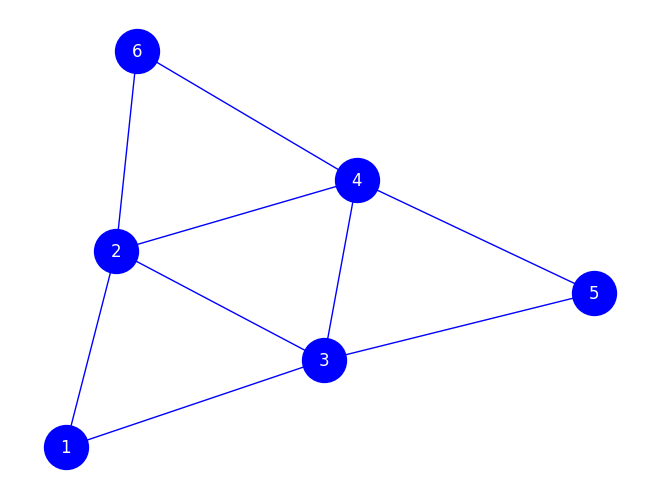

In [32]:
#Crear un grafo de 6 nodos
G=nx.Graph()
G.add_nodes_from(["1","2","3","4","5","6"])
G.add_edge("1","2")
G.add_edge("1","3")
G.add_edge("2","3")
G.add_edge("2","4")
G.add_edge("3","4")
G.add_edge("3","5")
G.add_edge("4","5")
G.add_edge("2","6")
G.add_edge("4","6")

# imprimimos los valores de nodos y aristas
print('Nodos',G.nodes())
print('Aristas', G.edges())

# dibujamos el grafo
#nx.draw(G,with_labels=True, node_size=1000, node_color='blue', edge_color='blue', font_color='white')
nx.draw(G,with_labels=True, 
                         node_size=1000, 
                         node_color='blue', 
                         edge_color='blue',
                         font_color='white')

### Crear el objeto BQM

Definimos una ecuación QUBO que expresa la funcion de optimización para este grafo en el problema de encontrar sus vertices de cobertura minima.

Después utilizamos la clase **BinaryQuadraticModel()** para crear un BQM, el tipo de objeto que necesitams para poderlo enviar a la QPU y que resuelva nuestro problema de optimizacion.

In [4]:
from dimod import BinaryQuadraticModel

linear = {('q_1', 'q_1'): -3, ('q_2', 'q_2'): -7,('q_3', 'q_3'): -7,('q_4', 'q_4'): -7,('q_5', 'q_5'): -3,('q_6', 'q_6'): -3}
quadratic = {('q_1', 'q_2'): 2,('q_1', 'q_3'): 2,('q_2', 'q_3'): 2,
             ('q_2', 'q_6'): 2,('q_2', 'q_4'): 2,('q_4', 'q_6'): 2,
             ('q_3', 'q_4'): 2,('q_3', 'q_5'): 2,('q_4', 'q_5'): 2
             }

Q = {**linear, **quadratic} #a Python dictionary comprehension that merges two dictionaries, linear and quadratic, into one. The resulting dictionary will contain all the key-value pairs from both linear and quadratic. If there are any keys that are common between the two dictionaries, the value from the quadratic dictionary will overwrite the value from the linear dictionary
bqm = BinaryQuadraticModel.from_qubo(Q, 18.0 )   #Create BQM object with method from_qubo() setting an offset to 1

#imprimimos el objeto BQM para ver su contenido
print(bqm)

BinaryQuadraticModel({'q_1': -3.0, 'q_2': -7.0, 'q_3': -7.0, 'q_4': -7.0, 'q_5': -3.0, 'q_6': -3.0}, {('q_2', 'q_1'): 2.0, ('q_3', 'q_1'): 2.0, ('q_3', 'q_2'): 2.0, ('q_4', 'q_2'): 2.0, ('q_4', 'q_3'): 2.0, ('q_5', 'q_3'): 2.0, ('q_5', 'q_4'): 2.0, ('q_6', 'q_2'): 2.0, ('q_6', 'q_4'): 2.0}, 18.0, 'BINARY')


### Enviar el BQM a la QPU

Para resolver en la QPU definimos el objeto muestreador, que toma la clase DWaveSampler() utilizando embedding automático con la clase EmbeddingComposite(). De esta forma declaramos que vamos a usar un muestreador cuántico y que queremos que el mapeo de nuestro problema a la QPU lo haga automáticamente DWave, sin preocuparnos nosotros de ello.

Podemos enviar nuestro problema a diferentes QPUs y probar como se resuelve en cada una de ellas. Probamos el Advantage con topologia Pegasus y Advantage2, con topología Zephyr.

In [41]:
# Ejecutar contra la QPU
sampler = EmbeddingComposite(DWaveSampler()) #Advantage with topology Pegasus is the default

#sampler = EmbeddingComposite(DWaveSampler(solver=dict(topology__type="zephyr"))) #uncomment this line to execute the code in Advantage2

Cuando usamos un sampler del sistema dwave del software Ocean para resolver en un sistema D-Wave, además de DWaveSampler(), debemos usar EmbeddingComposite(), que asigna problemas no estructurados a la estructura gráfica del sampler seleccionado, un proceso conocido como minor Embedding: nuestro problema QUBO puede verse como un grafo que se mapea en el grafo de la topología de la QPU , donde se asignan a los qubits  y los valores de los bias y couplers que se utilizarán para resolver nuestro problema.

Finalmente solo tenemos que ejecutar el muestreador para ejecutar nuestro problema de optimizacion en la QPU

In [ ]:
#Muestreamos la nuestro grafo QUBO con el sampler cuantico de D-Wave
sampleset = sampler.sample_qubo(Q, num_reads=5000, label='MIN VERTEX COVER (graph with six nodes)')

### Inspeccionar los resultados

Podemos imprimir el rancking de todos los resultados que han sido obtenidos, que estan ordenados por nivel minimo de Energia.

In [42]:
print(sampleset)

  q_1 q_2 q_3 q_4 q_5 q_6 energy num_oc. chain_b.
0   0   1   1   1   0   0  -15.0    4890      0.0
9   0   1   1   1   0   0  -15.0       1 0.166667
1   1   1   1   1   0   0  -14.0       3      0.0
2   0   1   1   1   1   0  -14.0       7      0.0
3   0   1   1   1   0   1  -14.0      11      0.0
4   0   1   1   0   1   1  -14.0      13      0.0
5   1   1   0   1   1   0  -14.0      59      0.0
6   1   0   1   1   0   1  -14.0      14      0.0
7   0   1   1   0   1   0  -13.0       1      0.0
8   0   1   1   0   0   0  -12.0       1      0.0
['BINARY', 10 rows, 5000 samples, 6 variables]


Podemos inspeccionar los resultados y como se ha mapeado el problema a bajo nivel en la QPU con la herramienta INPECTOR de D-Wave

In [ ]:
import dwave.inspector

# Inspect the problems sampleset
dwave.inspector.show(sampleset)

Podemos obtener el resultado optimo, de menor Energía y utilizarlo para visualizar en nuestro grafo, los nodos de covertura minima.

In [43]:
#first sample with minimum energy
minEnergy_sample=sampleset.samples()[0]
minEnergy_sample

{'q_1': 0, 'q_2': 1, 'q_3': 1, 'q_4': 1, 'q_5': 0, 'q_6': 0}

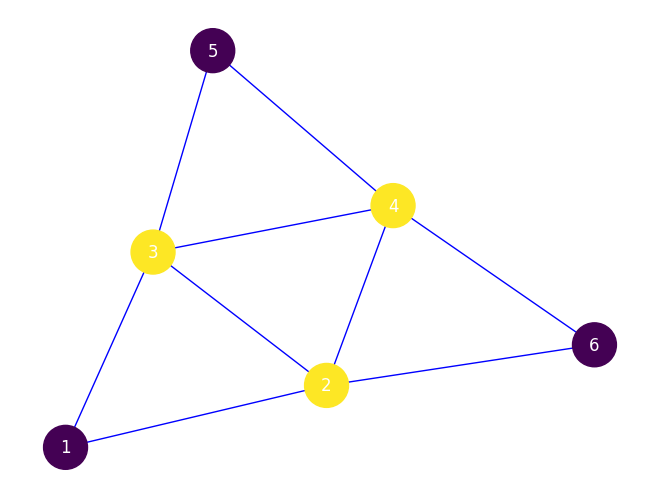

In [44]:
nx.draw(G,with_labels=True, 
                         node_size=1000, 
                         node_color=[v for (k,v) in minEnergy_sample.items()], 
                         edge_color='blue',
                         font_color='white')